In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data/data_manufacturing.xlsx")

In [3]:
df

,API Particle Size,Mill Time,Screen Size,MgSt Supplier,Lactose Supplier,Sugar Supplier,Talc Supplier,Blend Time,Blend Speed,Compressor,Force,Coating Supplier,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure,Dissolution
0,Small,27,4,Smith Ind,James Ind,Sour,Rough,16.043199,59.887383,COMPRESS2,25.466691,Mac,105.361158,107.945228,70.458995,404.603294,61.007068,79.86
1,Small,11,5,Jones Inc,James Ind,Sour,Smooth,14.361549,59.793030,COMPRESS2,24.934062,Mac,100.232484,107.540101,70.823684,407.367163,60.571220,72.82
2,Small,20,4,Jones Inc,Bond Inc,Sour,Rough,14.458745,60.797487,COMPRESS2,25.503908,Down,100.271603,106.605861,69.197350,399.301868,59.088228,74.18
3,Small,13,3,Smith Ind,Bond Inc,Sweet,Smooth,14.412131,59.398624,COMPRESS1,24.787632,Mac,98.008134,106.093734,68.809087,403.733927,58.844630,69.14
4,Small,13,5,Smith Ind,James Ind,Sweet,Smooth,16.111780,59.921639,COMPRESS2,25.316775,Down,97.582630,108.257381,69.447385,396.709347,59.589137,73.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Large,5,4,Smith Ind,James Ind,Sour,Smooth,13.836013,59.105242,COMPRESS2,25.329694,Coat,101.600640,107.945423,69.915316,401.016280,61.196363,70.58
86,Large,14,3,Smith Ind,Bond Inc,Sweet,Rough,16.963847,61.302848,COMPRESS2,24.578408,Coat,102.168031,107.372107,70.598444,402.636540,59.608586,69.70
87,Large,9,5,Smith Ind,Bond Inc,Sour,Rough,16.505517,61.216797,COMPRESS2,25.013860,Mac,94.154164,107.142674,69.645683,398.417407,61.742415,77.22
88,Large,24,4,Smith Ind,James Ind,Sour,Smooth,15.339437,60.448580,COMPRESS1,25.306691,Down,92.519135,107.320049,70.785988,404.073722,61.721232,78.58


In [7]:
object_columns = df.dtypes.index[df.dtypes == "object"]

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), object_columns)],
    remainder="passthrough",
    verbose_feature_names_out=False
)

In [ ]:
data_transformed = ct.fit_transform(df)
print(ct.get_feature_names_out())

['API Particle Size_Medium' 'API Particle Size_Small'
 'MgSt Supplier_Smith Ind' 'Lactose Supplier_James Ind'
 'Sugar Supplier_Sweet' 'Talc Supplier_Smooth' 'Compressor_COMPRESS2'
 'Coating Supplier_Down' 'Coating Supplier_Mac' 'Mill Time' 'Screen Size'
 'Blend Time' 'Blend Speed' 'Force' 'Coating Viscosity' 'Inlet Temp'
 'Exhaust Temp' 'Spray Rate' 'Atom. Pressure' 'Dissolution']


In [13]:
df = pd.DataFrame(data=data_transformed, columns=ct.get_feature_names_out())

In [14]:
df

,API Particle Size_Medium,API Particle Size_Small,MgSt Supplier_Smith Ind,Lactose Supplier_James Ind,Sugar Supplier_Sweet,Talc Supplier_Smooth,Compressor_COMPRESS2,Coating Supplier_Down,Coating Supplier_Mac,Mill Time,Screen Size,Blend Time,Blend Speed,Force,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure,Dissolution
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27.0,4.0,16.043199,59.887383,25.466691,105.361158,107.945228,70.458995,404.603294,61.007068,79.86
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,11.0,5.0,14.361549,59.793030,24.934062,100.232484,107.540101,70.823684,407.367163,60.571220,72.82
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0,4.0,14.458745,60.797487,25.503908,100.271603,106.605861,69.197350,399.301868,59.088228,74.18
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,13.0,3.0,14.412131,59.398624,24.787632,98.008134,106.093734,68.809087,403.733927,58.844630,69.14
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,13.0,5.0,16.111780,59.921639,25.316775,97.582630,108.257381,69.447385,396.709347,59.589137,73.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,13.836013,59.105242,25.329694,101.600640,107.945423,69.915316,401.016280,61.196363,70.58
86,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,14.0,3.0,16.963847,61.302848,24.578408,102.168031,107.372107,70.598444,402.636540,59.608586,69.70
87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0,16.505517,61.216797,25.013860,94.154164,107.142674,69.645683,398.417407,61.742415,77.22
88,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24.0,4.0,15.339437,60.448580,25.306691,92.519135,107.320049,70.785988,404.073722,61.721232,78.58


In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
X

,API Particle Size_Medium,API Particle Size_Small,MgSt Supplier_Smith Ind,Lactose Supplier_James Ind,Sugar Supplier_Sweet,Talc Supplier_Smooth,Compressor_COMPRESS2,Coating Supplier_Down,Coating Supplier_Mac,Mill Time,Screen Size,Blend Time,Blend Speed,Force,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27.0,4.0,16.043199,59.887383,25.466691,105.361158,107.945228,70.458995,404.603294,61.007068
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,11.0,5.0,14.361549,59.793030,24.934062,100.232484,107.540101,70.823684,407.367163,60.571220
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0,4.0,14.458745,60.797487,25.503908,100.271603,106.605861,69.197350,399.301868,59.088228
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,13.0,3.0,14.412131,59.398624,24.787632,98.008134,106.093734,68.809087,403.733927,58.844630
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,13.0,5.0,16.111780,59.921639,25.316775,97.582630,108.257381,69.447385,396.709347,59.589137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,13.836013,59.105242,25.329694,101.600640,107.945423,69.915316,401.016280,61.196363
86,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,14.0,3.0,16.963847,61.302848,24.578408,102.168031,107.372107,70.598444,402.636540,59.608586
87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0,16.505517,61.216797,25.013860,94.154164,107.142674,69.645683,398.417407,61.742415
88,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24.0,4.0,15.339437,60.448580,25.306691,92.519135,107.320049,70.785988,404.073722,61.721232


In [17]:
y

0     79.86
1     72.82
2     74.18
3     69.14
4     73.30
      ...  
85    70.58
86    69.70
87    77.22
88    78.58
89    69.78
Name: Dissolution, Length: 90, dtype: float64

In [23]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Dissolution   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     42.13
Date:                 Fr, 16 Mai 2025   Prob (F-statistic):           7.90e-31
Time:                        14:48:13   Log-Likelihood:                -128.62
No. Observations:                  90   AIC:                             297.2
Df Residuals:                      70   BIC:                             347.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, root_mean_squared_error

print(f"RMSE train: {root_mean_squared_error(y_train, y_pred_train)}, R2 train: {r2_score(y_train, y_pred_train)}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_pred_test)}, R2 test: {r2_score(y_test, y_pred_test)}")

RMSE train: 1.007071078163223, R2 train: 0.9193885580658139
RMSE test: 1.2236930845109206, R2 test: 0.873395034258341


Text(37.722222222222214, 0.5, 'Model Error: Training')

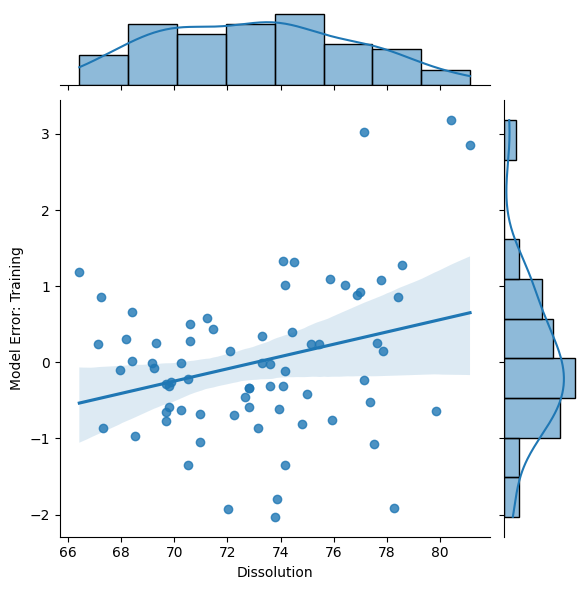

In [29]:
sns.jointplot(x=y_train, y=y_train-y_pred_train, kind="reg")
plt.ylabel("Model Error: Training")

Text(37.722222222222214, 0.5, 'Model Error: Test')

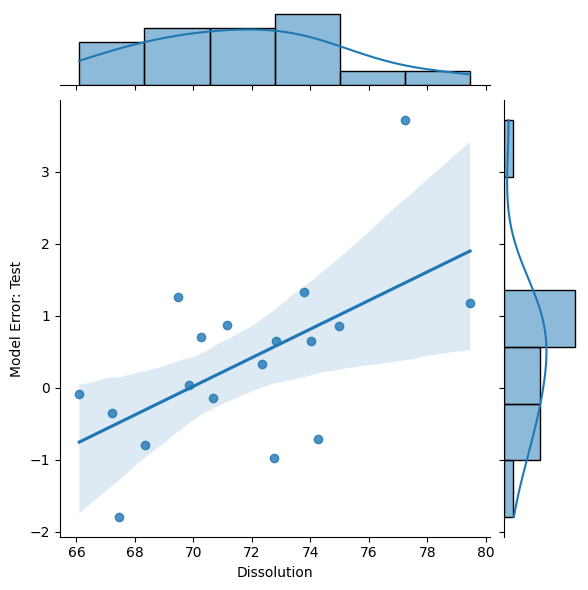

In [30]:
sns.jointplot(x=y_test, y=y_test-y_pred_test, kind="reg")
plt.ylabel("Model Error: Test")

Text(0, 0.5, 'Prediciton of y')

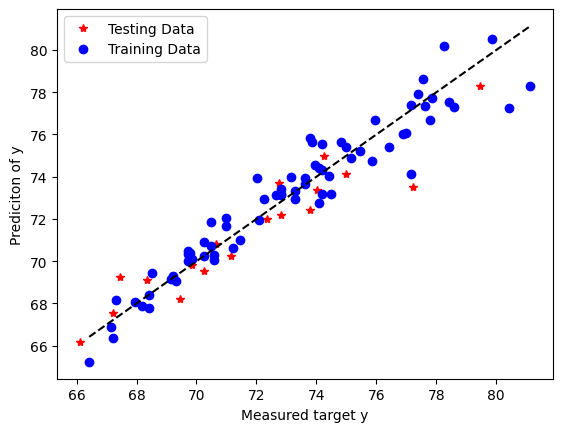

In [31]:
fig = plt.figure()

# pairity plot for both training and testing data
plt.plot(y_test, y_pred_test, '*r', label='Testing Data')
plt.plot(y_train, y_pred_train, 'ob', label='Training Data')
plt.plot([np.min(y_train), np.max(y_train)],[np.min(y_train), np.max(y_train)], "--k")

plt.legend()
plt.xlabel('Measured target y')
plt.ylabel('Prediciton of y')